In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from gensim.models import Word2Vec
import datetime
from dateutil.relativedelta import relativedelta
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
train=pd.read_csv("Training_set.csv")

In [3]:
train=train.sample(train.shape[0])

In [4]:
test=pd.read_csv("Test_set.csv")

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
test.shape

(45818, 25)

In [6]:
train.shape

(125136, 25)

In [7]:
def get_job_characteristics(df): 
    job_type=[]
    job_title=[]
    employer_title=[]
    employer_sector_title=[]
    job_sector_title=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        types=data["job_type"]
        title=data["job_title"]
        em_title=data["employer_title"]
        em_sec_title=data["employer_sector_title"]
        job_sec_title=data["job_sector_title"]
        job_type.append(types)
        job_title.append(title)
        employer_title.append(em_title)
        employer_sector_title.append(em_sec_title)
        job_sector_title.append(job_sec_title)
    d={}
    #d["job_title"]=job_title
    #d["employer_title"]=employer_title
    d["employer_sector_title"]=employer_sector_title
    d["job_sector_title"]=job_sector_title
    a=pd.DataFrame(d)
    data=pd.get_dummies(a)
    b=pd.get_dummies(job_type)
    result = pd.concat([data, b], axis=1, sort=False)
    return result

In [8]:
def get_data_for_user(user):
    jobtitles=list(user["job_title"].values)
    emtitles=list(user["employer_title"].values)
    jobsectitles=list(user["job_sector_title"].values)
    emsectitles=list(user["employer_sector_title"].values)
    a=""
    for k in range(len(jobtitles)):
        a+=jobtitles[k]+" "
        a+=emtitles[k]+" "
        a+=jobsectitles[k]+" "
        #a+=emsectitles[k]+" "
    return a

In [9]:
def get_user_characteristics(df):
    corpus=[]
    gender=[]
    ethnicity=[]
    school_type=[]
    right_to_work_uk=[]
    university_name=[]
    university_type=[]
    course_includes_industrial_placement=[]
    degree_subject_name=[]
    user_preference=[]
    job_types=list(set(df["job_type"].values))
    em_sectors=list(set(df["employer_sector_title"].values))
    job_sectors=list(set(df["job_sector_title"].values))
    count_job_types=[[] for i in range(len(job_types))]
    count_job_sectors=[[] for i in range(len(job_sectors))]
    count_em_sectors=[[] for i in range(len(em_sectors))]
    nb_em_sector=[]
    nb_job_sector=[]
    job_type=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        user=data["user_id"]
        user_data=df[df["user_id"]==user]
        user_job_type=dict(Counter(list(user_data["job_type"].values)))
        user_job_sectors=dict(Counter(list(user_data["job_sector_title"].values)))
        user_em_sectors=dict(Counter(list(user_data["employer_sector_title"].values)))
        user_em_sector=len(list(set(list(user_data["employer_sector_title"].values))))
        user_job_sector=len(list(set(list(user_data["job_sector_title"].values))))
        for i in range(len(count_job_types)):
            try:
                count_job_types[i].append(user_job_type[i])
            except:
                count_job_types[i].append(0)
        for i in range(len(count_job_sectors)):
            try:
                count_job_sectors[i].append(user_job_sectors[i])
            except:
                count_job_sectors[i].append(0)
        for i in range(len(count_em_sectors)):
            try:
                count_em_sectors[i].append(user_em_sectors[i])
            except:
                count_em_sectors[i].append(0)
        sex=data["gender"]
        jobtype=data["job_type"]
        eth=data["ethnicity"]
        school=data["school_type"]
        placement=data["course_includes_industrial_placement"]
        right=data["right_to_work_uk"]
        uni=data["university_name"]
        uni_type=data["university_type"]
        subname=data["degree_subject_name"]
        pref=data["user_preference"]
        title=data["job_title"]
        em_title=data["employer_title"]
        em_sec_title=data["employer_sector_title"]
        job_sec_title=data["job_sector_title"]
        if sex=="F":
            sex="Female"
        elif sex=="M":
            sex="Male"
        if placement==True:
            placement=1
        elif placement==False:
            placement=-1
        else:
            placement=0
        if right==True:
            right=1
        elif right==False:
            right=-1
        else:
            right=0
        if type(pref) is float:
            pref=""
        if type(subname) is float:
            subname=""
        nb_em_sector.append(user_em_sector)
        nb_job_sector.append(user_job_sector)
        gender.append(sex)
        ethnicity.append(eth)
        school_type.append(school)
        course_includes_industrial_placement.append(placement)
        right_to_work_uk.append(right)
        university_type.append(uni_type)
        #degree_subject_name.append(subname)
        #user_preference.append(pref)
        job_type.append(jobtype)
        corpus.append(pref+subname+" "+get_data_for_user(user_data))
    d={}
    for i in range(len(count_job_sectors)):
        d['count_job_sectors_'+str(i)]=count_job_sectors[i]
    for i in range(len(count_em_sectors)):
        d['count_em_sectors_'+str(i)]=count_em_sectors[i]
    for i in range(len(count_job_types)):
        d['count_job_types_'+str(i)]=count_job_types[i]
    d["gender"]=gender
    d["job_type"]=job_type
    d["nb_em_sector"]=nb_em_sector
    d["nb_job_sector"]=nb_job_sector
    d["right_to_work_uk"]=right_to_work_uk
    d["ethnicity"]=ethnicity
    #d["degree_subject_name"]=degree_subject_name
    d["school_type"]=school_type
    #d["user_preference"]=user_preference
    d["course_includes_industrial_placement"]=course_includes_industrial_placement
    a=pd.DataFrame(d)
    data=pd.get_dummies(a)
    b=pd.get_dummies(university_type)
    result = pd.concat([data, b], axis=1, sort=False)
    vectorizer = CountVectorizer(max_df=1.0, min_df=3)
    X = vectorizer.fit_transform(corpus)
    col=vectorizer.get_feature_names()
    donnees=X.toarray()
    print(X.shape)
    donnee=pd.DataFrame(donnees, columns=col)
    final=pd.concat([result, donnee], axis=1)
    return final

In [10]:
#user_characteristics=get_user_characteristics(train)

In [11]:
#user_characteristics.shape

In [12]:
#job_characteristics=get_job_characteristics(train)

In [13]:
#job_characteristics.shape

In [14]:
def get_user_info(df):
    user_info=[]
    d={}
    x=train[["user_id","job_title","employer_title","job_sector_title","job_description",
             "employer_sector_title","employer_description"]]
    n=df.shape[0]
    for i in range(n):
        if i%5000==0:
            print("progress: ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            y=x[x["user_id"]==user_id]
            if y.shape[0]>0:
                job_titles=y["job_title"].values
                job_sector_title=y["job_sector_title"].values
                description=y["job_description"].values
                em_titles=y["employer_title"].values
                em_sector_title=y["employer_sector_title"].values
                em_description=y["employer_description"].values
                university_name=data["university_name"]
                degree_subject_name=data["degree_subject_name"]
                user_preference=data["user_preference"]
                ethnicity=data["ethnicity"]
                school_type=data["school_type"]
                if type(user_preference) is float:
                    user_preference=""
                if type(university_name) is float:
                    university_name=""
                if type(degree_subject_name) is float:
                    degree_subject_name=""
                if type(ethnicity) is float:
                    ethnicity=""
                if type(school_type) is float:
                    school_type=""
                try:
                    if np.isnan(user_preference):
                        user_preference=""
                except:
                    pass
                try:
                    if np.isnan(university_name):
                        university_name=""
                except:
                    pass
                try:
                    if np.isnan(degree_subject_name):
                        degree_subject_name=""
                except:
                    pass
                try:
                    if np.isnan(ethnicity):
                        ethnicity=""
                except:
                    pass
                try:
                    if np.isnan(school_type):
                        school_type=""
                except:
                    pass
                user_preference=user_preference+" "
                user_preference=user_preference *3
                degree_subject_name=degree_subject_name+" "
                degree_subject_name=degree_subject_name *3
                a=""
                a+=university_name+" "
                a+=degree_subject_name+" "
                a+=user_preference+" "
                a+=ethnicity+" "
                a+=school_type+" "
                for k in range(len(job_titles)):
                    a+=job_titles[k]+" "
                    a+=job_sector_title[k]+" "
                    a+=description[k]+" "
                    a+=em_titles[k]+" "
                    a+=em_sector_title[k]+" "
                    a+=em_description[k]+" "
                a=a.replace("Graduate","").replace("Programme","").replace("  "," ").replace("&","")
            else:
                university_name=data["university_name"]
                degree_subject_name=data["degree_subject_name"]
                user_preference=data["user_preference"]
                ethnicity=data["ethnicity"]
                school_type=data["school_type"]
                if type(user_preference) is float:
                    user_preference=""
                if type(university_name) is float:
                    university_name=""
                if type(degree_subject_name) is float:
                    degree_subject_name=""
                if type(ethnicity) is float:
                    ethnicity=""
                if type(school_type) is float:
                    school_type=""
                try:
                    if np.isnan(user_preference):
                        user_preference=""
                except:
                    pass
                try:
                    if np.isnan(university_name):
                        university_name=""
                except:
                    pass
                try:
                    if np.isnan(degree_subject_name):
                        degree_subject_name=""
                except:
                    pass
                try:
                    if np.isnan(ethnicity):
                        ethnicity=""
                except:
                    pass
                try:
                    if np.isnan(school_type):
                        school_type=""
                except:
                    pass
                user_preference=user_preference+" "
                user_preference=user_preference *3
                degree_subject_name=degree_subject_name+" "
                degree_subject_name=degree_subject_name *3
                a=""
                a+=university_name+" "
                a+=degree_subject_name+" "
                a+=user_preference+" "
                a+=ethnicity+" "
                a+=school_type+" "
            d[str(user_id)]=a
        user_info.append(a)
    return user_info

In [15]:
test_user_info=get_user_info(test)

progress:  0.0
progress:  0.10912741717229037
progress:  0.21825483434458073
progress:  0.3273822515168711
progress:  0.43650966868916147
progress:  0.5456370858614519
progress:  0.6547645030337422
progress:  0.7638919202060326
progress:  0.8730193373783229
progress:  0.9821467545506133


In [16]:
train_user_info=get_user_info(train)

progress:  0.0
progress:  0.03995652729829945
progress:  0.0799130545965989
progress:  0.11986958189489835
progress:  0.1598261091931978
progress:  0.19978263649149725
progress:  0.2397391637897967
progress:  0.27969569108809617
progress:  0.3196522183863956
progress:  0.35960874568469503
progress:  0.3995652729829945
progress:  0.43952180028129395
progress:  0.4794783275795934
progress:  0.5194348548778929
progress:  0.5593913821761923
progress:  0.5993479094744918
progress:  0.6393044367727913
progress:  0.6792609640710906
progress:  0.7192174913693901
progress:  0.7591740186676895
progress:  0.799130545965989
progress:  0.8390870732642884
progress:  0.8790436005625879
progress:  0.9190001278608874
progress:  0.9589566551591868
progress:  0.9989131824574863


In [63]:
train_user_info[10]

'London School of Economics and Political Science (LSE) Statistics Statistics Statistics Investment Banking Investment  Asset Management Accounting, Tax  Audit Entrepreneurship  Start Ups Financial Services Investment Banking Investment  Asset Management Accounting, Tax  Audit Entrepreneurship  Start Ups Financial Services Investment Banking Investment  Asset Management Accounting, Tax  Audit Entrepreneurship  Start Ups Financial Services    Financial Services <h2>About Insight</h2>\r\r\n\r\r\n<p>Insight is one of the UK#39;s largest active managers responsible for pound;552bn* in assets under management globally across fixed income, risk management strategies including liability-driven investment and currency risk management, absolute return and multi-asset capabilities.</p>\r\r\n\r\r\n<p>Insight is a specialist asset manager with a global network of operations based in the UK and growing presence in the US as well as Japan and Australia. Our clients include pension funds, corporates,

In [17]:
len(train_user_info)

125136

In [18]:
len(test_user_info)

45818

In [19]:
def clean_user(x,df):
    n=len(x)
    res=[]
    d={}
    for i,content in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            y=d[str(user_id)]
        except:
            content=content.replace(",","").replace("-"," ").replace("  "," ").replace("&eacute;","e")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
            content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
            content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
            content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
            content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
            content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
            content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
            content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=re.sub('<.*?>',"",content , flags=re.DOTALL)
            content=content.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
            try:
                content=''.join([i for i in content if not i.isdigit()])
            except:
                pass
            content=content.split(" ")
            y=[]
            for i in content:
                if len(i)>1:
                    y.append(i.lower())
            d[str(user_id)]=y
        res.append(y)
    return res

In [20]:
clean_test_user_info=clean_user(test_user_info, test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [21]:
clean_train_user_info=clean_user(train_user_info, train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [22]:
def get_job_info(df):
    job_info=[]
    d={}
    for i in range(df.shape[0]):
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            title=data["job_title"]
            job_sector_title=data["job_sector_title"]
            description=data["job_description"]
            em_title=data["employer_title"]
            em_sector_title=data["employer_sector_title"]
            em_description=data["employer_description"]
            a=""
            a+=title+" "
            a+=job_sector_title+" "
            a+=description+" "
            a+=em_title+" "
            a+=em_sector_title+" "
            a+=em_description
            d[str(job_id)]=a
        job_info.append(a)
    return job_info

In [23]:
test_job_info=get_job_info(test)

In [24]:
train_job_info=get_job_info(train)

In [25]:
def clean(x,df):
    res=[]
    n=len(x)
    d={}
    for i,content in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            y=d[str(job_id)]
        except:
            content=content.replace(",","").replace("-"," ").replace("  "," ").replace("&eacute;","e")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
            content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
            content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
            content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
            content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
            content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
            content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
            content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
            content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
            content=re.sub('<.*?>',"",content , flags=re.DOTALL)
            content=content.replace("&ldquo;","").replace("ldquo;","").replace("&rdquo;","").replace("rdquo;","")
            try:
                content=''.join([i for i in content if not i.isdigit()])
            except:
                pass
            content=content.split(" ")
            y=[]
            for i in content:
                if len(i)>1:
                    y.append(i.lower())
            d[str(job_id)]=y
        res.append(y)
    return res

In [26]:
cleaned_test_job_info=clean(test_job_info,test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [27]:
cleaned_train_job_info=clean(train_job_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [28]:
def remove_stopwords_job(x, df):
    res=[]
    n=len(x)
    d={}
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,job in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            a=[]
            for word in job:
                if word not in stop:
                    a.append(word)
            d[str(job_id)]=a
        res.append(a)
    return res

In [29]:
def remove_stopwords_user(x, df):
    res=[]
    n=len(x)
    d={}
    with open('stopwords.txt') as stopfile:
        stopwords = stopfile.read()
        stop = stopwords.split()
    for i,user in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            a=[]
            for word in user:
                if word not in stop:
                    a.append(word)
            d[str(user_id)]=a
        res.append(a)
    return res

In [30]:
test_clean=remove_stopwords_job(cleaned_test_job_info,test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [31]:
train_clean=remove_stopwords_job(cleaned_train_job_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [32]:
test_user_clean=remove_stopwords_user(clean_test_user_info,test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [33]:
train_user_clean=remove_stopwords_user(clean_train_user_info,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [34]:
def get_occurence_job(x,df):
    res=[]
    n=len(x)
    d={}
    for i,job in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            a=d[str(job_id)]
        except:
            a=dict(Counter(job))
            d[str(job_id)]=a
        res.append(a)
    return res

In [35]:
def get_occurence_user(x,df):
    res=[]
    n=len(x)
    d={}
    for i,user in enumerate(x):
        if i%5000==0:
            print("progress : ",i/n)
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            a=d[str(user_id)]
        except:
            a=dict(Counter(user))
            d[str(user_id)]=a
        res.append(a)
    return res

In [36]:
test_occurences=get_occurence_job(test_clean,test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [37]:
occurences=get_occurence_job(train_clean,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [38]:
test_user_occurences=get_occurence_user(test_user_clean,test)

progress :  0.0
progress :  0.10912741717229037
progress :  0.21825483434458073
progress :  0.3273822515168711
progress :  0.43650966868916147
progress :  0.5456370858614519
progress :  0.6547645030337422
progress :  0.7638919202060326
progress :  0.8730193373783229
progress :  0.9821467545506133


In [39]:
train_user_occurences=get_occurence_user(train_user_clean,train)

progress :  0.0
progress :  0.03995652729829945
progress :  0.0799130545965989
progress :  0.11986958189489835
progress :  0.1598261091931978
progress :  0.19978263649149725
progress :  0.2397391637897967
progress :  0.27969569108809617
progress :  0.3196522183863956
progress :  0.35960874568469503
progress :  0.3995652729829945
progress :  0.43952180028129395
progress :  0.4794783275795934
progress :  0.5194348548778929
progress :  0.5593913821761923
progress :  0.5993479094744918
progress :  0.6393044367727913
progress :  0.6792609640710906
progress :  0.7192174913693901
progress :  0.7591740186676895
progress :  0.799130545965989
progress :  0.8390870732642884
progress :  0.8790436005625879
progress :  0.9190001278608874
progress :  0.9589566551591868
progress :  0.9989131824574863


In [40]:
def get_vector_job(occurences, jobs, vector_size,df):
    vector=[]
    d={}
    model = Word2Vec.load('final_model.bin')
    nb=len(jobs)
    for i,job in enumerate(jobs):
        if i%10000==0:
            print("progress : ",i/nb )
        data=df.iloc[i]
        job_id=data["job_id"]
        try:
            res=d[str(job_id)]
        except:
            res=np.zeros(vector_size,)
            n=sum(list(occurences[i].values()))
            job_unique=list(set(job))
            for word in job_unique:
                try:
                    a=model[word]
                except:
                    #print(word)
                    a=None
                if a is not None:
                    count=occurences[i][word]
                    w=count/n
                    res+=w*a
            d[str(job_id)]=res
        vector.append(res)
    return vector

In [41]:
def get_vector_user(occurences, users, vector_size,df):
    vector=[]
    d={}
    model = Word2Vec.load('final_model.bin')
    nb=len(users)
    for i,user in enumerate(users):
        if i%10000==0:
            print("progress : ",i/nb )
        data=df.iloc[i]
        user_id=data["user_id"]
        try:
            res=d[str(user_id)]
        except:
            res=np.zeros(vector_size,)
            n=sum(list(occurences[i].values()))
            user_unique=list(set(user))
            for word in user_unique:
                try:
                    a=model[word]
                except:
                    #print(word)
                    a=None
                if a is not None:
                    count=occurences[i][word]
                    w=count/n
                    res+=w*a
            d[str(user_id)]=res
        vector.append(res)
    return vector

In [42]:
test_X=get_vector_job(test_occurences, test_clean, 350,test)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.21825483434458073
progress :  0.43650966868916147
progress :  0.6547645030337422
progress :  0.8730193373783229


In [43]:
X=get_vector_job(occurences, train_clean, 350,train)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.0799130545965989
progress :  0.1598261091931978
progress :  0.2397391637897967
progress :  0.3196522183863956
progress :  0.3995652729829945
progress :  0.4794783275795934
progress :  0.5593913821761923
progress :  0.6393044367727913
progress :  0.7192174913693901
progress :  0.799130545965989
progress :  0.8790436005625879
progress :  0.9589566551591868


In [44]:
test_X_user=get_vector_user(test_user_occurences, test_user_clean, 350, test)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.21825483434458073
progress :  0.43650966868916147
progress :  0.6547645030337422
progress :  0.8730193373783229


In [45]:
X_user=get_vector_user(train_user_occurences, train_user_clean, 350, train)

progress :  0.0


C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


progress :  0.0799130545965989
progress :  0.1598261091931978
progress :  0.2397391637897967
progress :  0.3196522183863956
progress :  0.3995652729829945
progress :  0.4794783275795934
progress :  0.5593913821761923
progress :  0.6393044367727913
progress :  0.7192174913693901
progress :  0.799130545965989
progress :  0.8790436005625879
progress :  0.9589566551591868


In [46]:
test_X_train=np.array(test_X)

In [47]:
test_X_train.shape

(45818, 350)

In [48]:
X_train=np.array(X)

In [49]:
X_train.shape

(125136, 350)

In [50]:
test_X_train_user=np.array(test_X_user)

In [51]:
X_train_user=np.array(X_user)

In [52]:
X_train_user.shape

(125136, 350)

In [53]:
#X_train_job_final=np.concatenate((X_train, job_characteristics.values), axis=1)

In [54]:
#X_train_job_final.shape

In [55]:
#X_train_user_final=np.concatenate((X_train_user, user_characteristics.values), axis=1)

In [56]:
#X_train_user_final.shape

In [ ]:
#pca = PCA(n_components=2)
#result_user = pca.fit_transform(X_train_user_final)

In [ ]:
#print(pca.explained_variance_ratio_)

In [ ]:
#pca = PCA(n_components=2)
#result = pca.fit_transform(X_train_job_final)

In [ ]:
#print(pca.explained_variance_ratio_)

In [ ]:
#users=list(train["user_id"].values)
#users=[str(i) for i in users]

In [ ]:
def get_job_info_plot(df):
    job_info=[]
    for i in range(df.shape[0]):
        data=df.iloc[i]
        title=data["job_title"]
        em_title=data["employer_title"]
        a=""
        a+=title+" "
        a+=em_title+" "
        job_info.append(a)
    return job_info

In [ ]:
#infos=get_job_info_plot(train)

In [ ]:
"""k=200
plt.figure(figsize=(20,20))
plt.scatter(result_user[:k, 0], result_user[:k, 1])
for i, word in enumerate(users[:k]):
    plt.annotate(word, xy=(result_user[i, 0], result_user[i, 1]))
plt.show()"""

In [ ]:
train.iloc[10][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']]

In [57]:
def get_similar_member(df, X_train, doc_id, n):
    res=[]
    beta=[]
    cos=list(cosine_similarity(X_train[doc_id,:].reshape(1, -1) , X_train))[0]
    most_similar_doc_id=np.argsort(cos)[::-1]
    a=0
    while cos[most_similar_doc_id[a]]>=0.9999999:
        a+=1
    most_similar_doc_id=most_similar_doc_id[a:]
    res.append(df.iloc[most_similar_doc_id[0]]["user_id"])
    beta.append(cos[most_similar_doc_id[0]])
    for i in range(1,len(most_similar_doc_id)):
        if cos[most_similar_doc_id[i]] not in beta:
            user=df.iloc[most_similar_doc_id[i]]["user_id"]
            if user not in res:
                res.append(user)
                beta.append(cos[most_similar_doc_id[i]])
    print(" user id : ", df.iloc[doc_id]["user_id"])
    print("most similar doc : ", res[:n])
    print("most similar values : ", beta[:n])
    print("not similar doc : ", res[-n:][::-1])
    print("not similar values : ", beta[-n:][::-1])

In [58]:
get_similar_member(train, X_train_user, 10, 5)

 user id :  59365
most similar doc :  [65985, 185112, 190852, 92010, 158665]
most similar values :  [0.9848739037964513, 0.9838818298337505, 0.983350788752962, 0.9823717989488371, 0.9821263816281471]
not similar doc :  [158698, 180714, 173617, 193292, 142975]
not similar values :  [-0.09798083534331051, -0.08992350190165588, 0.0725479229976655, 0.17130549787710345, 0.22546025931161903]


# user

In [59]:
train[train["user_id"]==59365][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail()

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
102869,Opportunities for Graduates,Guernsey Financial Services Commission,Insurance & Risk Management Financial Services,Insurance & Risk Management Financial Services,Female,NaN,London School of Economics and Political Scien...,Statistics,Investment Banking Investment & Asset Manageme...
102874,Graduate Performance Marketing Analyst,King,Technology: IT & Software Development Technolo...,Technology: Consulting & Project Management Ma...,Female,NaN,London School of Economics and Political Scien...,Statistics,Investment Banking Investment & Asset Manageme...
102879,Graduate Programme - Area Manager,Aldi,"Consumer, FMCG & Retail",Management & Business,Female,NaN,London School of Economics and Political Scien...,Statistics,Investment Banking Investment & Asset Manageme...
102872,Graduate Programme,Skillcapital,Financial Services,Financial Services,Female,NaN,London School of Economics and Political Scien...,Statistics,Investment Banking Investment & Asset Manageme...
102873,Private Client Tax Trainee Guilford,Smith & Williamson,"Accounting, Tax & Audit Financial Services","Accounting, Tax & Audit",Female,NaN,London School of Economics and Political Scien...,Statistics,Investment Banking Investment & Asset Manageme...


# similar users

In [65]:
train[train["user_id"]==65985][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(20)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
972,Graduate Data Scientist,Hiscox,Insurance & Risk Management,Insurance & Risk Management,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
1009,Graduate Teacher Training Programme,Ark Teacher Training,Charity & Social Enterprise Education & Teaching,Charity & Social Enterprise,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
1011,Graduate Programs,Credit Suisse,Investment Banking Investment & Asset Management,Financial Services,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
999,Audit - Graduate,BDO,"Insurance & Risk Management Accounting, Tax & ...",Investment Banking Insurance & Risk Management...,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
1002,Discover Graduate Programme Finance,Vodafone,"Consumer, FMCG & Retail Technology: IT & Softw...","Consumer, FMCG & Retail Technology: IT & Softw...",Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
986,ACA Graduate - Corporate Audit - January 2019,Moore Stephens LLP,Financial Services,Financial Services,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
969,Commercial Pharmacy Services Graduate Scheme,Walgreens Boots Alliance,"Pharmaceuticals Consumer, FMCG & Retail","Consumer, FMCG & Retail Pharmaceuticals",Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
987,2018 Associate Programme,On Purpose,Management & Business Charity & Social Enterpr...,Charity & Social Enterprise,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
1013,Graduate Analyst,Marsh Ltd,Financial Services,Financial Services,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."
1017,Housing Graduate,Balfour Beatty,Engineering Technology: Consulting & Project M...,HR & Recruitment,Male,NaN,Kings College London (KCL),Law,"Commercial Law Consumer, FMCG & Retail Educati..."


In [64]:
train[train["user_id"]==158665][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail()

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
106751,Associate Programme 2019 intake,AlphaSights,Management & Business Sales & Commercial,Consulting Entrepreneurship & Start Ups,Female,White/White British,University of Leeds,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
106753,Graduate Business Community,Capgemini,Technology: Consulting & Project Management Te...,Technology: Consulting & Project Management Fi...,Female,White/White British,University of Leeds,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
106770,Global Graduate Leadership Programme,Aviva,Insurance & Risk Management,"Accounting, Tax & Audit Financial Services",Female,White/White British,University of Leeds,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
106760,Business Analyst,AT Kearney,Consulting,Consulting,Female,White/White British,University of Leeds,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
106763,Business Finance Programme,Thales,Technology: Consulting & Project Management,Technology: Consulting & Project Management Fi...,Female,White/White British,University of Leeds,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."


# not similar users

In [66]:
train[train["user_id"]==158698][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
106992,Herbert Smith Freehills Event Dates 2017-2018,Herbert Smith Freehills,Commercial Law,Commercial Law,Male,Asian/Asian British,University of Warwick,Engineering - Mechanical,Commercial Law


In [ ]:
train[train["user_id"]==186752][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

In [ ]:
train[train["user_id"]==98253][['job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(7)

In [ ]:
def get_similar_doc(X_train, doc_id, n):
    res=[]
    beta=[]
    cos=list(cosine_similarity(X_train[doc_id,:].reshape(1, -1) , X_train))[0]
    most_similar_doc_id=np.argsort(cos)[::-1]
    a=0
    while cos[most_similar_doc_id[a]]>=0.9999999:
        a+=1
    most_similar_doc_id=most_similar_doc_id[a:]
    res.append(most_similar_doc_id[0])
    beta.append(cos[most_similar_doc_id[0]])
    for i in range(1,len(most_similar_doc_id)):
        if cos[most_similar_doc_id[i]] not in beta:
            res.append(most_similar_doc_id[i])
            beta.append(cos[most_similar_doc_id[i]])
    print("most similar doc : ", res[:n])
    print("most similar values : ", beta[:n])
    print("not similar doc : ", res[-n:][::-1])
    print("not similar values : ", beta[-n:][::-1])

In [ ]:
def clean_similarity(x):
    res=[] 
    for content in x:
        content=content.replace(",","").replace("-"," ").replace("  "," ")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=content.replace("&bull;","\r\n ").replace("bull;","\r\n ").replace("\r\r\n\t"," ").replace("\r\r\n"," ")
        content=content.replace("\r\r\n\r\r\n"," ").replace("..."," ").replace("&#39;s","").replace(":","")
        content=content.replace("&eacute;","e").replace("&lsquo;","").replace("lsquo;","").replace("&#39;","").replace("#39;s","")
        content=content.replace("&nbsp;"," ").replace("nbsp;"," ").replace("&#39;","").replace("amp;","").replace("&middot;","")
        content=content.replace("."," ").replace(",","").replace("?"," ").replace("!","").replace("  "," ").replace("middot;","")
        content=content.replace("&rsquo;","").replace("rsquo;"," ").replace("\t"," ").replace("\r\n\r\n","").replace(" \r\n ","")
        content=content.replace("&ndash;"," ").replace("ndash;"," ").replace("\r\n\r\n"," ").replace(" \r\n "," ").replace("\r\n"," ")
        content=content.replace("\r"," ").replace("  ","").replace("   ","").replace("  ","").replace("   ","")
        content=content.replace("(","").replace(")","").replace(" - "," ").replace(" / "," ").replace("/"," ").replace("   ","")
        content=re.sub('<.*?>',"",content , flags=re.DOTALL)
        res.append(content)
    return res

In [ ]:
data_similarity=clean_similarity(train_job_info)

In [ ]:
get_similar_doc(X_train, 10, 5)

# job

In [ ]:
data_similarity[10]

# Similar jobs

In [ ]:
data_similarity[69307]

# not similar jobs

In [ ]:
data_similarity[74064]

In [70]:
data = np.concatenate((X_train, X_train_user), axis=1)

In [71]:
test_data = np.concatenate((test_X_train, test_X_train_user), axis=1)

In [72]:
test_data.shape

(45818, 700)

In [73]:
data.shape

(125136, 700)

# Autoencoder

In [67]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import SGD, Adam

C:\Users\Lassana Diabira\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [68]:
from keras.models import load_model

# Create model

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, data, test_size=0.1)

In [79]:
x_test.shape

(12514, 700)

In [76]:
input_data = Input(shape=(data.shape[1],))
encoded = Dense(600, activation='relu')(input_data)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(500, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(400, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)
encoded = Dense(300, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(200, activation='relu')(encoded)
#encoded = Dropout(0.1)(encoded)
encoded = Dense(100, activation='relu')(encoded)
#encoded = Dropout(0.4)(encoded)
encoded = Dense(50, activation='relu')(encoded)

decoded = Dense(100, activation='relu')(encoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(200, activation='relu')(decoded)
#decoded = Dropout(0.1)(decoded)
decoded = Dense(300, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(400, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
decoded = Dense(500, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(600, activation='relu')(decoded)
#decoded = Dropout(0.4)(decoded)
#decoded = Dense(800, activation='relu')(decoded)
decoded = Dense(data.shape[1], activation='linear')(decoded)

In [ ]:
autoencoder = Model(input_data, decoded)
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam=Adam(lr=0.001, beta_1=0.8, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder.compile(loss='mean_squared_error', optimizer=adam)

history=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 112622 samples, validate on 12514 samples
Epoch 1/10
112622/112622 [==============================] - 84s 747us/step - loss: 0.0095 - val_loss: 0.0082
Epoch 2/10
112622/112622 [==============================] - 55s 486us/step - loss: 0.0074 - val_loss: 0.0067
Epoch 3/10
112622/112622 [==============================] - 56s 494us/step - loss: 0.0062 - val_loss: 0.0060
Epoch 4/10
112622/112622 [==============================] - 55s 489us/step - loss: 0.0053 - val_loss: 0.0051
Epoch 5/10
112622/112622 [==============================] - 55s 486us/step - loss: 0.0049 - val_loss: 0.0046
Epoch 6/10
112622/112622 [==============================] - 55s 487us/step - loss: 0.0044 - val_loss: 0.0043
Epoch 7/10
 65000/112622 [================>.............] - ETA: 22s - loss: 0.0042

# Loss

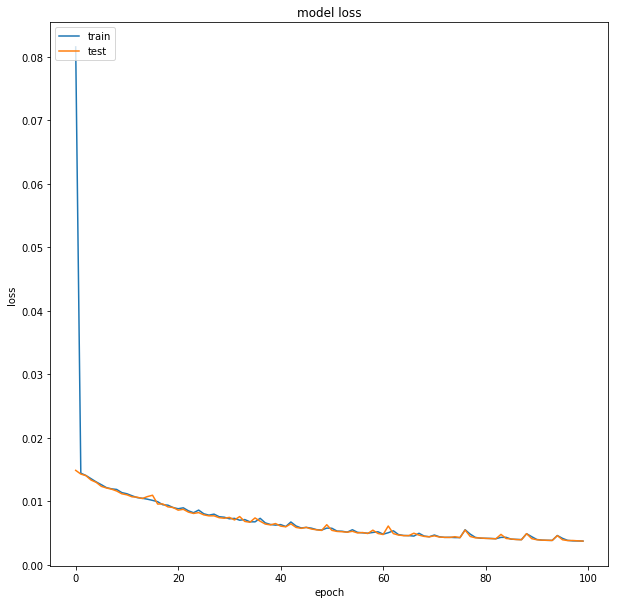

In [95]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
autoencoder.save('model.h5')

In [105]:
train_predictions=new_autoencoder.predict(data)

array([-0.03540946, -0.13441858,  0.08056124,  0.221413  ,  0.04294347,
       -0.11343296,  0.09547411,  0.5490711 ,  0.09030824, -0.14575076,
        0.09732994,  0.25514287, -0.07246329, -0.304709  , -0.02670881,
        0.02543148, -0.52797604,  0.13422094, -0.18471085,  0.2620564 ,
        0.28889632,  0.18621181,  0.07269341, -0.03742869, -0.41475394,
       -0.26988146,  0.30755162, -0.05940884,  0.11596066, -0.41828525,
       -0.06874769, -0.40843824,  0.5901353 , -0.16069542, -0.12840036,
       -0.05864508,  0.0919178 ,  0.09166344,  0.05268285,  0.03566686,
        0.00840456, -0.09534641,  0.15067512, -0.11718532, -0.04379994,
        0.09595412,  0.32305303, -0.02799875,  0.15663776,  0.05690826],
      dtype=float32)

In [106]:
test_predictions=new_autoencoder.predict(test_data)

In [107]:
def get_test_user_id(df):
    users=list(set(list(df["user_id"].values)))
    d={}
    for user in users:
        d[str(user)]=[]
    n=df.shape[0]
    for i in range(n):
        user_id=df.iloc[i]["user_id"]
        d[str(user_id)].append(i)
    return d

array([-0.02102856, -0.13744961,  0.06806465,  0.20344211,  0.04803307,
       -0.12442788,  0.09628485,  0.51898635,  0.09287311, -0.14808669,
        0.10933098,  0.27176079, -0.08411171, -0.31209839, -0.03819622,
        0.04017922, -0.54759633,  0.14166643, -0.18378697,  0.26381813,
        0.29700438,  0.18665482,  0.05854281, -0.03329473, -0.42165206,
       -0.2665128 ,  0.30136341, -0.06027701,  0.10689598, -0.39721733,
       -0.07260506, -0.3946092 ,  0.59495724, -0.16362847, -0.1210157 ,
       -0.0570148 ,  0.11056362,  0.06788637,  0.05184581,  0.03291846,
       -0.00090651, -0.10980141,  0.14912577, -0.1111011 , -0.0446132 ,
        0.08853083,  0.32535498, -0.04012543,  0.1758333 ,  0.05684665])

In [108]:
list(set(list(test["user_id"].values)))

array([-0.03540946, -0.13441858,  0.08056124,  0.221413  ,  0.04294347,
       -0.11343296,  0.09547411,  0.5490711 ,  0.09030824, -0.14575076,
        0.09732994,  0.25514287, -0.07246329, -0.304709  , -0.02670881,
        0.02543148, -0.52797604,  0.13422094, -0.18471085,  0.2620564 ,
        0.28889632,  0.18621181,  0.07269341, -0.03742869, -0.41475394,
       -0.26988146,  0.30755162, -0.05940884,  0.11596066, -0.41828525,
       -0.06874769, -0.40843824,  0.5901353 , -0.16069542, -0.12840036,
       -0.05864508,  0.0919178 ,  0.09166344,  0.05268285,  0.03566686,
        0.00840456, -0.09534641,  0.15067512, -0.11718532, -0.04379994,
        0.09595412,  0.32305303, -0.02799875,  0.15663776,  0.05690826],
      dtype=float32)

In [109]:
select_ids=get_test_user_id(test)

In [ ]:
selected_user=select_ids["65715"]

In [ ]:
test_mse_1 = np.power(test_data[selected_user] - test_predictions[selected_user], 2)
mse_1 = np.power(data - train_predictions, 2)

In [ ]:
df_test.head(2)

In [ ]:
df_train.head(2)

In [ ]:
test_reconstruction_error[:10]

In [ ]:
train_reconstruction_error=df_train.sum(axis=1)

In [ ]:
train_reconstruction_error[:10]

In [ ]:
def get_max(df,treshold):
    x=df.describe(percentiles=[treshold])[5]
    return x

In [ ]:
train_max=get_max(train_reconstruction_error,0.9)

In [ ]:
train_max

In [ ]:
rank_jobs=np.argsort(test_reconstruction_error)

In [ ]:
rank_jobs

In [ ]:
def make_recommendations(x,treshold):
    res=[]
    for i in x:
        if i<=1.5*treshold:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [ ]:
recommendations=make_recommendations(test_reconstruction_error, train_max)

In [ ]:
sum(recommendations)

In [ ]:
recommended_jobs=rank_jobs[:sum(recommendations)]

# User info

In [ ]:
train[train["user_id"]==98379][['employer_id','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(20)

# Recommendations

In [ ]:
recommended_jobs

In [ ]:
test.iloc[selected_user[0]+60][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

# Not to recommend

In [ ]:
rank_jobs[-10:]

# load model

In [58]:
new_autoencoder = load_model("final_final_model.h5")

In [226]:
adam=Adam(lr=0.0005, beta_1=0.8, beta_2=0.9, epsilon=None, decay=0.00005, amsgrad=False)
new_autoencoder.compile(loss='mean_squared_error', optimizer=adam)

new_autoencoder.fit(data, data,
                epochs=20,
                batch_size=500,
                shuffle=True)

Epoch 1/20
125136/125136 [==============================] - 101s 804us/step - loss: 0.0019
Epoch 2/20
125136/125136 [==============================] - 70s 559us/step - loss: 0.0019
Epoch 3/20
125136/125136 [==============================] - 70s 562us/step - loss: 0.0019
Epoch 4/20
125136/125136 [==============================] - 70s 562us/step - loss: 0.0019
Epoch 5/20
125136/125136 [==============================] - 70s 561us/step - loss: 0.0019
Epoch 6/20
125136/125136 [==============================] - 70s 562us/step - loss: 0.0019
Epoch 7/20
125136/125136 [==============================] - 70s 561us/step - loss: 0.0019
Epoch 8/20
125136/125136 [==============================] - 70s 563us/step - loss: 0.0019
Epoch 9/20
125136/125136 [==============================] - 71s 566us/step - loss: 0.0019
Epoch 10/20
125136/125136 [==============================] - 70s 563us/step - loss: 0.0019
Epoch 11/20
125136/125136 [==============================] - 70s 560us/step - loss: 0.0019
Epoch 1

In [281]:
new_autoencoder.save('final_final_model.h5')

In [59]:
train_predictions=new_autoencoder.predict(data)

In [60]:
test_predictions=new_autoencoder.predict(test_data)

In [61]:
def get_test_user_id(df):
    users=list(set(list(df["user_id"].values)))
    d={}
    for user in users:
        d[str(user)]=[]
    n=df.shape[0]
    for i in range(n):
        user_id=df.iloc[i]["user_id"]
        d[str(user_id)].append(i)
    return d

In [62]:
list(set(list(test["user_id"].values)))

[98304,
 65537,
 65540,
 65541,
 65546,
 65547,
 131084,
 131085,
 65553,
 98322,
 131091,
 65556,
 65559,
 163864,
 65564,
 65565,
 65568,
 98337,
 65570,
 131108,
 65573,
 65574,
 98343,
 65576,
 163881,
 196649,
 163885,
 155182,
 98350,
 98352,
 65586,
 98355,
 65588,
 65589,
 65591,
 65592,
 163896,
 65594,
 163899,
 65598,
 65600,
 98369,
 131137,
 98377,
 98379,
 131148,
 98382,
 65616,
 65617,
 163922,
 163920,
 163923,
 163924,
 98390,
 163931,
 163935,
 65634,
 65635,
 131172,
 65638,
 182378,
 182381,
 65646,
 65650,
 182388,
 163957,
 196726,
 163959,
 65657,
 131194,
 163963,
 65658,
 131195,
 131196,
 196735,
 98432,
 163970,
 98437,
 65673,
 98442,
 65677,
 163984,
 131216,
 163985,
 98456,
 65688,
 65691,
 131229,
 164001,
 98466,
 65700,
 98468,
 164005,
 164008,
 131242,
 164011,
 196780,
 98481,
 164019,
 65715,
 158909,
 36104,
 108355,
 186752,
 117634,
 98253,
 158698]

In [62]:
select_ids=get_test_user_id(test)

In [89]:
selected_user=select_ids["65715"]

In [90]:
test_mse_1 = np.power(test_data[selected_user] - test_predictions[selected_user], 2)
mse_1 = np.power(data - train_predictions, 2)

In [91]:
df_train=pd.DataFrame(mse_1, columns=["col"+str(i) for i in range(mse_1.shape[1])])
df_test=pd.DataFrame(test_mse_1, columns=["col"+str(i) for i in range(mse_1.shape[1])])

In [92]:
df_test.head(2)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col690,col691,col692,col693,col694,col695,col696,col697,col698,col699
0,0.000002,0.004906,0.016908,0.011194,0.001816,0.000001,0.014035,0.000426,0.005750,2.998666e-04,...,0.002943,0.011524,0.001483,0.000578,0.003182,0.000084,0.002983,0.000545,0.000059,0.006575
1,0.000364,0.023178,0.000309,0.014194,0.000205,0.015281,0.015010,0.006111,0.000786,6.294564e-07,...,0.003260,0.015958,0.002753,0.000932,0.003529,0.000017,0.003720,0.005275,0.000070,0.008727


In [93]:
df_train.head(2)

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col690,col691,col692,col693,col694,col695,col696,col697,col698,col699
0,0.002696,0.001519,0.009119,0.001534,0.000611,0.008460,0.004968,0.002931,0.003258,0.001675,...,0.003141,2.086759e-03,0.002485,0.015196,0.000279,0.000076,0.000205,0.000585,0.006671,0.000035
1,0.000025,0.000003,0.000202,0.000395,0.000138,0.000112,0.000691,0.000205,0.000223,0.000013,...,0.000501,2.986609e-07,0.000051,0.000884,0.001014,0.001589,0.002139,0.000002,0.000041,0.000353


In [94]:
test_reconstruction_error=df_test.sum(axis=1).values

In [95]:
test_reconstruction_error[:10]

array([2.8460949 , 5.10248128, 3.62325739, 2.84297884, 2.32453662,
       5.45789053, 2.47540449, 3.70215561, 3.84120312, 5.36956359])

In [96]:
train_reconstruction_error=df_train.sum(axis=1)

In [97]:
train_reconstruction_error[:10]

0    2.927731
1    0.483755
2    0.563776
3    0.805782
4    0.422806
5    1.578620
6    3.460139
7    1.475282
8    0.267711
9    1.659980
dtype: float64

In [98]:
def get_max(df,treshold):
    x=df.describe(percentiles=[treshold])[5]
    return x

In [99]:
train_max=get_max(train_reconstruction_error,0.9)

In [100]:
train_max

2.603267520396407

In [101]:
rank_jobs=np.argsort(test_reconstruction_error)

In [102]:
rank_jobs

array([ 60, 224,  28, 105, 129,  63,  48, 125, 293, 190, 223,   4, 252,
       192, 226, 111,  73, 118, 255, 203, 282,   6, 133, 170, 188, 197,
       126, 160, 233, 257,  15, 171,  81,  38,  94, 238,  39, 254, 130,
       237,  76,  89, 241,  72, 239, 229, 132, 194, 240, 283, 227, 288,
       289, 265, 244, 275, 199,  66,  58, 276,  55,   3,   0,  17, 136,
        43, 279, 182, 143, 207, 168, 228, 281,  68, 146, 247, 205,  35,
        65, 109, 112, 208, 110, 176,  44, 253, 195, 286,  24, 280, 117,
        92, 258, 261, 269, 122, 121, 287,  51,  69, 196, 201, 131, 120,
       191,  25, 104,  16,  93, 235,  96,  32, 149, 186, 274,  53, 209,
       206, 156,  50, 115, 213, 202, 245, 101, 198,  57, 135,  21,  86,
       178,  82, 242, 144, 273, 267,   2, 193, 246,  52, 161, 278, 189,
         7, 262,  97, 210,  33, 154,  18,  36,  59,  87, 211, 217,  56,
         8,  91,  77,  47, 214, 148,  98, 216, 268,  75,  70,  67, 155,
        34, 250, 165,  20, 169,  54,  88,  90, 232, 116, 128, 14

In [103]:
def make_recommendations(x,treshold):
    res=[]
    for i in x:
        if i<=1.5*treshold:
            res.append(1)
        else:
            res.append(0)
    return np.array(res)

In [104]:
recommendations=make_recommendations(test_reconstruction_error, train_max)

In [105]:
sum(recommendations)

165

In [106]:
recommended_jobs=rank_jobs[:sum(recommendations)]

# jobs infos

In [86]:
list(set(list(test["employer_title"].values)))

['Concentra',
 'DE Shaw & Co.',
 'ARM Ltd',
 'Archus',
 'London Business School',
 'Bright Network Springboard',
 'Alpha FMC',
 'CGG',
 'Facebook',
 'BPP Professional Education',
 'Weengs',
 'Bondy Consulting',
 'Jefferies International Limited',
 'Greenhill & Co.',
 'Amazon',
 'Skillcapital',
 'University of Law',
 'Babcock International Group',
 'PwC',
 'KPMG',
 'IBM',
 'Alliance Manchester Business School',
 'Bloomberg',
 'SETsquared',
 'Credit Suisse',
 'Inner Square',
 'Imperial College Business School',
 'Kennedys',
 'Cambridge Judge Business School',
 'Bow & Arrow',
 'Barclays',
 'Swindon Silicon Systems',
 'Harris Federation',
 'Cognizant',
 'Coller Capital',
 'Bluebay Asset Management',
 'PageGroup',
 'ICAEW',
 'BP',
 'Cass Business School',
 'The School of Life',
 'FDM Group',
 'RPC',
 'Henley Business School',
 'Slaughter and May',
 'Glisser',
 'Worthwhile',
 'Jones Day',
 'McKinsey & Company',
 'Third Bridge',
 'P&G',
 'BDO',
 'Amec Foster Wheeler',
 'Dell',
 'Unilever',
 '

In [87]:
list(set(list(test["job_sector_title"].values)))

['Financial Services',
 'Management & Business',
 'Commercial Law',
 'Technology: Consulting & Project Management',
 'Education & Teaching',
 'Further Education',
 'Sales & Commercial',
 'Investment Banking',
 'Engineering',
 'Accounting, Tax & Audit',
 'Media, Film & TV',
 'Consulting',
 'Charity & Social Enterprise',
 'Marketing and PR',
 'Entrepreneurship & Start Ups',
 'Science and Research',
 'Technology: IT & Software Development',
 'Public Sector & Government',
 'Consumer, FMCG & Retail']

In [115]:
train[train["user_id"]==98379][['employer_id','job_title','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].tail(20)

,employer_id,job_title,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
295,311.0,Graduate Programme,HM Treasury,Public Sector & Government,Financial Services,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
293,459.0,Graduate Data Scientist,Hiscox,Insurance & Risk Management,Insurance & Risk Management,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
299,38.0,ACA Qualification,ICAEW,Financial Services,"Accounting, Tax & Audit",Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
290,56.0,Business Analyst,McKinsey & Company,Consulting,Consulting,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
301,51.0,Human Resources,Shell,Engineering,Engineering,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
297,37.0,Deutsche Bank Graduate Programme,Deutsche Bank,Technology: Consulting & Project Management,Technology: Consulting & Project Management,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
298,234.0,Business Roles,BP,Engineering,Technology: Consulting & Project Management,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
294,132.0,New Analyst Programme,Goldman Sachs,Financial Services,Technology: Consulting & Project Management,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
300,338.0,Accountancy and Finance Programme,Babcock International Group,Technology: Consulting & Project Management,Engineering,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."
296,401.0,Graduate Programme,Skillcapital,Financial Services,Financial Services,Male,Prefer not to say,Durham University,Economics,"Consumer, FMCG & Retail Entrepreneurship & Sta..."


In [108]:
recommended_jobs

array([ 60, 224,  28, 105, 129,  63,  48, 125, 293, 190, 223,   4, 252,
       192, 226, 111,  73, 118, 255, 203, 282,   6, 133, 170, 188, 197,
       126, 160, 233, 257,  15, 171,  81,  38,  94, 238,  39, 254, 130,
       237,  76,  89, 241,  72, 239, 229, 132, 194, 240, 283, 227, 288,
       289, 265, 244, 275, 199,  66,  58, 276,  55,   3,   0,  17, 136,
        43, 279, 182, 143, 207, 168, 228, 281,  68, 146, 247, 205,  35,
        65, 109, 112, 208, 110, 176,  44, 253, 195, 286,  24, 280, 117,
        92, 258, 261, 269, 122, 121, 287,  51,  69, 196, 201, 131, 120,
       191,  25, 104,  16,  93, 235,  96,  32, 149, 186, 274,  53, 209,
       206, 156,  50, 115, 213, 202, 245, 101, 198,  57, 135,  21,  86,
       178,  82, 242, 144, 273, 267,   2, 193, 246,  52, 161, 278, 189,
         7, 262,  97, 210,  33, 154,  18,  36,  59,  87, 211, 217,  56,
         8,  91,  77,  47, 214, 148,  98, 216, 268], dtype=int64)

In [109]:
rank_jobs[-10:]

array([234, 177,  62, 220, 292, 157, 221,  13,  83, 222], dtype=int64)

In [110]:
test.iloc[selected_user[0]+60][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([65715, 'Graduate Analyst',
       '<h2>Do you want a &pound;40,000 starting salary&nbsp;AND the opportunity to make a difference?</h2>\r\r\n\r\r\n<p>We are&nbsp;seeking to recruit bright and driven graduates from all disciplines to work on exciting, life-saving projects in our expanding Analyst team based in Leeds.</p>\r\r\n\r\r\n<p>As a TPP Analyst, you will be working on initiatives such as implementing our clinical software solution globally, developing innovative app technology and carrying out ground breaking research projects. Your influence will have a direct impact on the future of healthcare.</p>\r\r\n\r\r\n<p>You will be responsible for scoping, designing and implementing first of type technology which will change lives across the world. This involves liaising with end users to understand their needs, and then using your expert knowledge of SystmOne functionality to help customers shape a system that works for them. This role requires you to work collaboratively, both 

In [111]:
test.iloc[selected_user[0]+224][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([65715,
       'Graduate Consultant - Transportation, Strategic Consultancy',
       '<h2>Job Summary</h2>\r\r\n\r\r\n<p>AECOM is built to deliver a better world. We design, build, finance and operate infrastructure assets for governments, businesses and organizations in more than 150 countries. As a fully integrated firm, we connect knowledge and experience across our global network of experts to help clients solve their most complex challenges. From high-performance buildings and infrastructure, to resilient communities and environments, to stable and secure nations, our work is transformative, differentiated and vital. A Fortune 500 firm, see how we deliver what others can only imagine at aecom.com and @AECOM.</p>\r\r\n\r\r\n<p>Our UK based Strategic Consultancy team undertakes a wide range of technical management consultancy projects. Our client range is diverse and includes national and private asset owners and operators, infrastructure construction organisations and environ

In [282]:
test.iloc[selected_user[0]+4][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([65715, 'Process Engineering Programme',
       '<h2>Process Engineering</h2>\r\r\n\r\r\n<p>Start with the microscopic detail and work your way up. That&rsquo;s what our process engineers do. Join them and you&rsquo;ll help us develop robust, innovative solutions to extraordinary challenges. Over two to four years, you&rsquo;ll work with cutting-edge technology and build your experience in anything from submarine and commercial marine projects, to next-generation construction projects in civil nuclear.</p>\r\r\n\r\r\n<h2>Where you can join us</h2>\r\r\n\r\r\n<p>Places on our Process Engineering graduate programme for Autumn 2018 are available within our Marine (Plymouth) sector. But no matter which team you join, you could be based anywhere in the UK. That&rsquo;s why we ask all our graduates to be flexible and willing to move during their programme.</p>\r\r\n\r\r\n<h2>What you&#39;ll be doing</h2>\r\r\n\r\r\n<p>There&rsquo;s so much you could potentially do at Babcock. You may f

In [253]:
test.iloc[selected_user[0]+43][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([65646, 'Summer Internship Programs',
       '<h2>Summer Internship Program</h2>\r\r\n\r\r\n<p>Our Summer Internship Program is designed to offer real insight into our business. The program typically lasts ten weeks and is one of the most in-depth internships within the financial services industry. From day one you&rsquo;ll be part of the team. You&rsquo;ll face real challenges, have client exposure, enjoy real achievements and have your talents recognized every step of the way.</p>\r\r\n\r\r\n<p>You&rsquo;ll be responsible for projects and tasks that matter to the business. You&rsquo;ll grow in knowledge, skills and confidence. Above all, you&rsquo;ll experience the team spirit that makes Credit Suisse such a special place to work. Our program managers will help guide you through your summer experience, and each intern is assigned a mentor and a buddy, so you&rsquo;ll have all the support you need.</p>\r\r\n\r\r\n<p>If you show real potential and demonstrate exceptional performa

# Not recommended jobs

In [86]:
test.iloc[selected_user[0]+222][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([164008, 'Postgraduate Research',
       '<h2>Further Your Knowledge With People Who Change The Way The World Thinks About Business</h2>\r\r\n\r\r\n<p>Few business schools can provide you with an opportunity to work alongside some of the world&#39;&#39;s most distinguished research-led academics and thought leaders. With its global reputation for business thinking, Henley attracts some of the most influential academics and practitioners - people who are widely published and who are proud to share their wealth of professional knowledge with you.<br />\r\r\n<br />\r\r\nDuring your studies you will benefit from dedicated supervision, impressive facilities and high quality support. You will also be working with a diverse cohort of fellow students who have a broad range of academic and professional backgrounds to expand and broaden your outlook.&nbsp;<br />\r\r\n<br />\r\r\nFrom our academically rigorous PhD programme to the practically-oriented Henley DBA (Doctor of Business Administ

In [112]:
test.iloc[selected_user[0]+83][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']].values

array([65715, 'Graduate opportunities 2017',
       '<p>We&#39;re excited to let you know that applications for KPMG&#39;s 2017 graduate programme are now open, and there&#39;s plenty of exciting opportunties that could be perfect for you.&nbsp;</p>\r\r\n\r\r\n<p>KPMG LLP is one of the UK&rsquo;s largest providers of tax, audit and advisory services. They are a UK limited liability partnership, employing 12,000 people and have 22 offices across the country, unified by a vision to be the clear choice in the market. They focus on clients&rsquo; big issues and opportunities by providing innovative approaches and deep expertise to deliver real results. KPMG in the UK is stronger for being part of a global network, operating in 155 countries.</p>\r\r\n\r\r\n<p>Their people are at the heart of their continued success and being part of KPMG is being part of a community of talented and innovative people, working together to have a positive, lasting impact on clients. No one type of person succ

In [88]:
train[train["job_sector_title"]=="Commercial Law"][['user_id','job_title','job_description','employer_title', 'employer_sector_title', 'job_sector_title', 'gender',
       'ethnicity', 'university_name', 'degree_subject_name', 'user_preference']]

,user_id,job_title,job_description,employer_title,employer_sector_title,job_sector_title,gender,ethnicity,university_name,degree_subject_name,user_preference
112367,159764,CMS Academy Programme 2019,<p>The CMS Academy is CMS&rsquo;s next generat...,CMS,Commercial Law,Commercial Law,Female,White/White British,University of Leeds,Environmental Geography and Climate Change,"Commercial Law Investment Banking Media, Film ..."
108474,126220,Herbert Smith Freehills Event Dates 2017-2018,<p>There are lots of opportunities to meet wit...,Herbert Smith Freehills,Commercial Law,Commercial Law,Female,Prefer not to say,London School of Economics and Political Scien...,Government and History,NaN
79540,153532,Legal Work Placement,<h2>Description</h2>\r\r\n\r\r\n<p>Our two wee...,Irwin Mitchell,Commercial Law,Commercial Law,Female,White/White British,University of Birmingham,Accounting & Finance,"Commercial Law Consumer, FMCG & Retail Energy ..."
112846,159873,Winter Vacation Scheme,<h2>Structure:</h2>\r\r\n\r\r\n<p>Our one-week...,Kennedys,Commercial Law,Commercial Law,Male,White/White British,Durham University,Accounting & Finance and Economics,Commercial Law Insurance & Risk Management Con...
95928,188471,Open Days 2017/18,<p>Participating in an Open Day at Norton Rose...,Norton Rose Fulbright,Commercial Law,Commercial Law,Male,NaN,NaN,NaN,"Commercial Law Accounting, Tax & Audit Investm..."
22572,106740,Open Days London/Bristol 2017/18,<p>We will be hosting a series of&nbsp;Open Da...,Simmons & Simmons,Commercial Law,Commercial Law,Female,Asian/Asian British,Kings College London (KCL),Modern Languages,Marketing and PR Commercial Law Investment Ban...
49501,148020,Training Contract,<p>Taking four six-month seats over the divisi...,Addleshaw Goddard,Commercial Law,Commercial Law,Female,Black/African/Carribean/Black British,The University of Law,Law,Charity & Social Enterprise Commercial Law Ent...
60286,182782,Summer Vacation Scheme,<h2>Summer Vacation Scheme</h2>\r\r\n\r\r\n<p>...,Dentons,Commercial Law,Commercial Law,Male,White/White British,Imperial College London,Materials Science and Technology,Commercial Law Management & Business Consulting
120072,129025,Training Contract 2020,<p>Taylor Wessing is a full-service internatio...,Taylor Wessing,Commercial Law,Commercial Law,Male,White/White British,University of Leicester,Law,NaN
88165,154806,Leadership Development Programme,<p>Unlocked turns talented graduates into insp...,Unlocked,Charity & Social Enterprise,Commercial Law,Male,White/White British,Warwick Business School,Accounting & Finance,NaN


In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predictions, x_test))
print(mean_absolute_error(predictions, x_test))

0.003920869654342296
0.043668805322460515
